Original Shape:  (569, 30)
Reduced Shape:  (569, 30)
PCA Component Shape:  (2, 30)
PCA Components
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


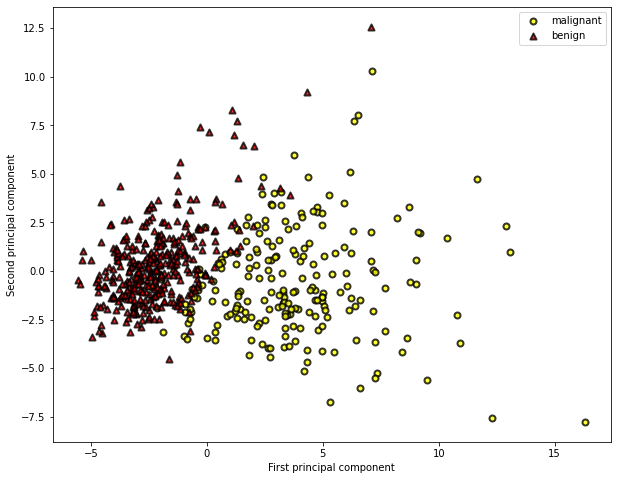

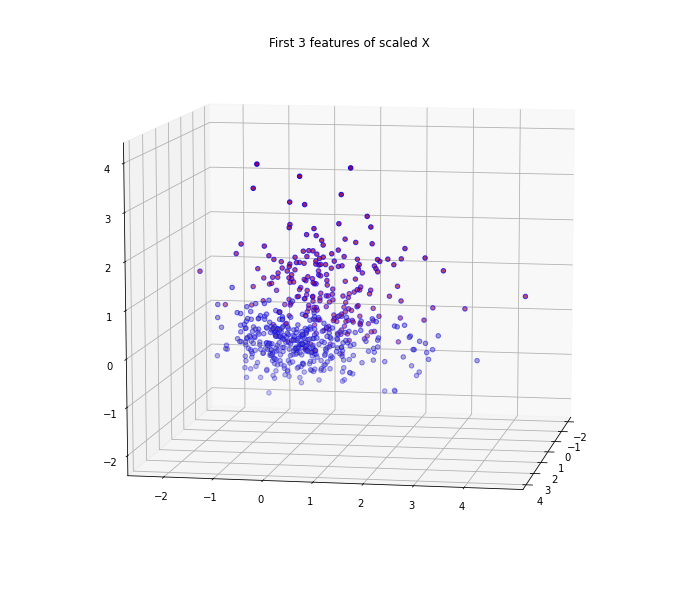

Text(0.5, 0.92, 'First two principal components of X after PCA transformation')

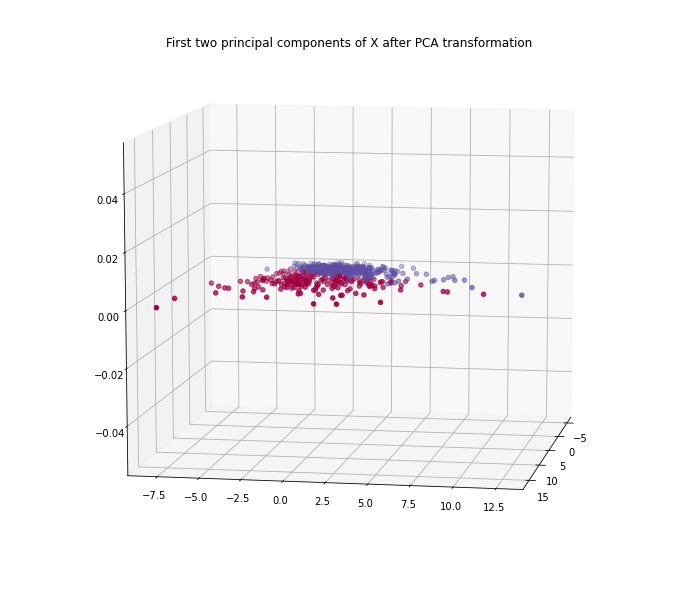

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.datasets import load_breast_cancer # import the cancer dataset
cancer = load_breast_cancer() 
y = cancer.target

# Data manupulation
scaler = StandardScaler()
Scale = scaler.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(Scale)
PCA_Data = pca.transform(Scale)


# Print PCA Data
print('Original Shape: ', cancer.data.shape)
print('Reduced Shape: ', Scale.shape)
print('PCA Component Shape: ', pca.components_.shape)
print('PCA Components')
print(pca.components_)

# 2D Plot
plt.subplots(figsize=(10, 8))
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
    
colors = ['yellow', 'red']
lw = 2
    
i = 0
z = ["o","^"]
for color, i, target_name in zip(colors, [0, 1], cancer.target_names):
    plt.scatter(PCA_Data[y == i, 0], PCA_Data[y == i, 1], color=color, alpha=.8, 
                    lw=lw,label=target_name, marker=z[i], edgecolors='k')
  
plt.legend()

#3D plot
def Generate_3D_Plot_first(Data, y):  
    
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=10)
    cmap = plt.cm.get_cmap("Spectral")    
    
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(Data[:, 0], Data[:, 1], Data[:, 2], c=y, cmap=cmap,edgecolor='b')
    
    plt.title('First 3 features of scaled X')
    
    plt.show()

Generate_3D_Plot_first(Scale, y)

#3D Plot

data_tran=scaler.transform(cancer.data)
pca=pca.transform(data_tran)

x=pca[:,0]      
y=pca[:,1]
z = 0

#plot
fig = plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap("Spectral")
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=10) 
ax.scatter(x,y,z, c=cancer.target, cmap=cmap)
ax.set_title('First two principal components of X after PCA transformation')